# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [2]:
# YOUR CODE HERE
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv"

df = pd.read_csv(url)
df.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [3]:
df.describe()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [8]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


# 5-Fold Cross validate model with deafult KNNRegressor
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

cv_results = cross_validate(model, X, y, cv=5,
                            scoring=['max_error',
                                     'r2',
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
print(pd.DataFrame(cv_results))

base_knn_score = cv_results['test_r2'].mean()
print(f"Base KNN score: {base_knn_score}")


   fit_time  score_time  test_max_error   test_r2  \
0  0.006972    0.005804       -174598.0  0.624196   
1  0.002059    0.003638       -367250.0  0.628392   
2  0.001899    0.003653       -290050.0  0.609521   
3  0.001892    0.003807       -277207.0  0.640277   
4  0.002002    0.003680       -363050.0  0.540434   

   test_neg_mean_absolute_error  test_neg_mean_squared_error  
0                 -32223.605479                -2.079182e+09  
1                 -31809.040411                -2.441716e+09  
2                 -33969.325342                -2.958971e+09  
3                 -28366.980137                -1.822304e+09  
4                 -36087.522603                -3.081559e+09  
Base KNN score: 0.6085640394084016


### 🧪 Check your code

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [11]:
# YOUR CODE HERE
# Use MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

# Evaluate the model on the rescaled data
model = KNeighborsRegressor()
cv_results = cross_validate(model, X_rescaled, y, cv=5,
                            scoring=['max_error',
                                     'r2',
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )

rescaled_score = cv_results['test_r2'].mean()
print(f"Rescaled KNN score: {rescaled_score}")


Rescaled KNN score: 0.6496841000103444


👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [ ]:
# YOUR CODE HERE


❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

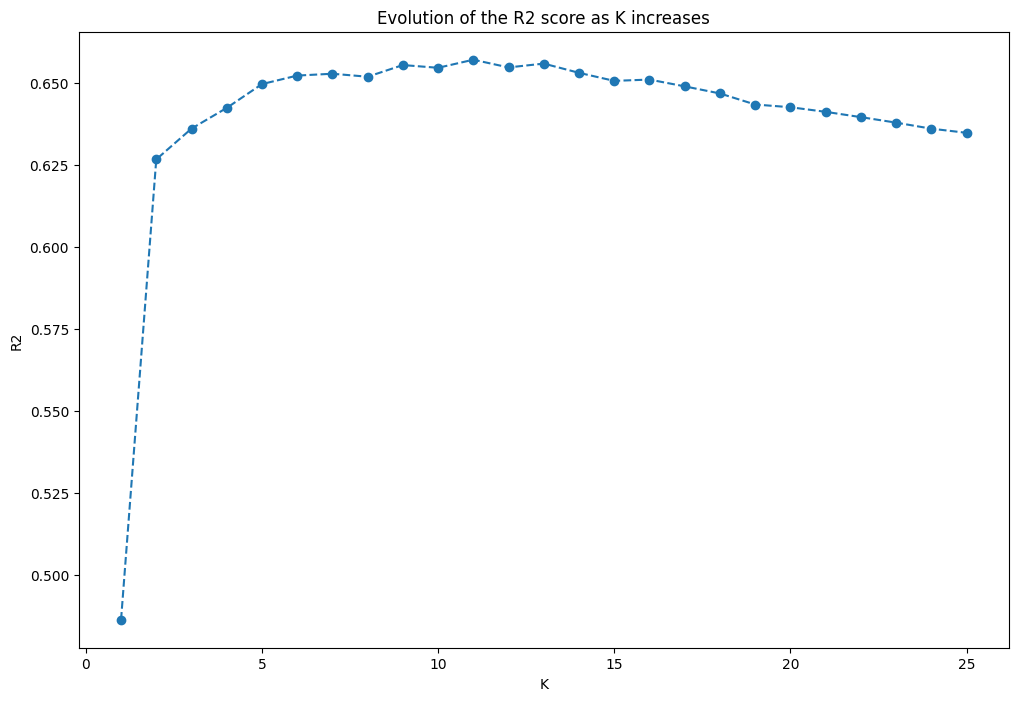

Best K: 0.6571094901627201


In [17]:
# YOUR CODE HERE
# Plot the evolution of the score as K increases from 1 to 25
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scores = []
for k in range(1, 26):
    model = KNeighborsRegressor(n_neighbors=k)
    cv_results = cross_validate(model, X_rescaled, y, cv=5,
                                scoring=['max_error',
                                         'r2',
                                         'neg_mean_absolute_error',
                                         'neg_mean_squared_error']
                               )
    scores.append(cv_results['test_r2'].mean())

plt.figure(figsize=(12, 8))
plt.plot(range(1, 26), scores, marker='o', linestyle='--')
plt.xlabel('K')
plt.ylabel('R2')
plt.title('Evolution of the R2 score as K increases')
plt.show()

# Find the index of the best score
best_k = np.argmax(scores)
print(f"Best K: {scores[best_k]}")


<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

When k is too low, it'll overfit the training data.

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

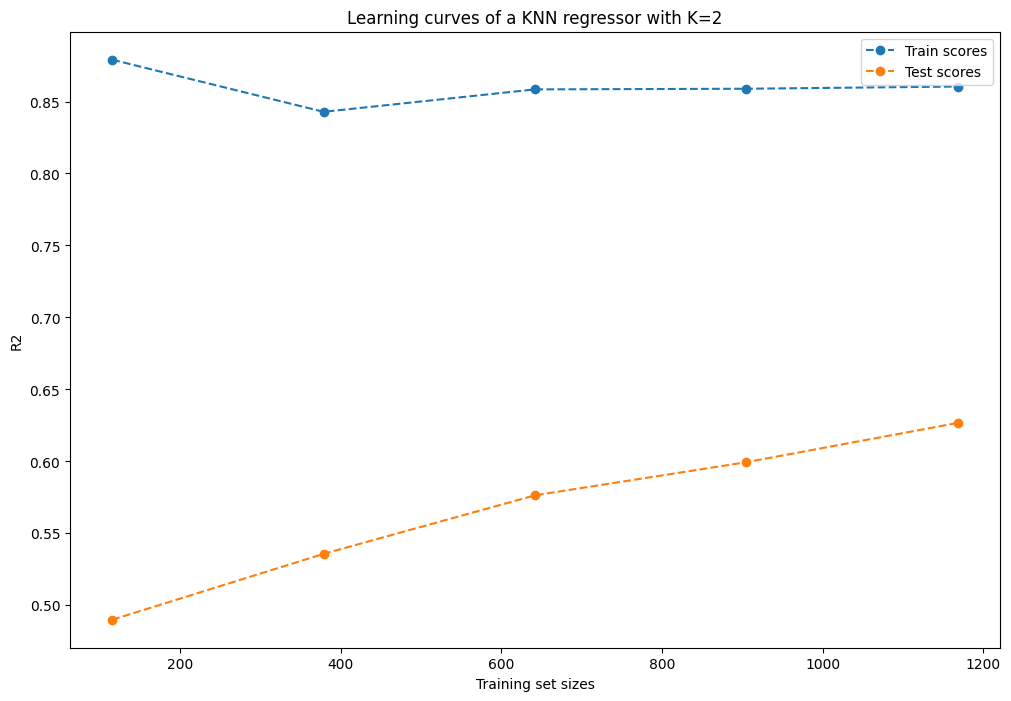

In [20]:
# YOUR CODE HERE
# Plot the learning curves of a KNN regressor with K=2
from sklearn.model_selection import learning_curve

model = KNeighborsRegressor(n_neighbors=2)
train_sizes, train_scores, test_scores = learning_curve(model, X_rescaled, y, cv=5)

plt.figure(figsize=(12, 8))
plt.plot(
    train_sizes,
    train_scores.mean(axis=1),
    marker="o",
    linestyle="--",
    label="Train scores",
)
plt.plot(
    train_sizes,
    test_scores.mean(axis=1),
    marker="o",
    linestyle="--",
    label="Test scores",
)
plt.xlabel("Training set sizes")
plt.ylabel("R2")
plt.title("Learning curves of a KNN regressor with K=2")
plt.legend()
plt.show()


👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

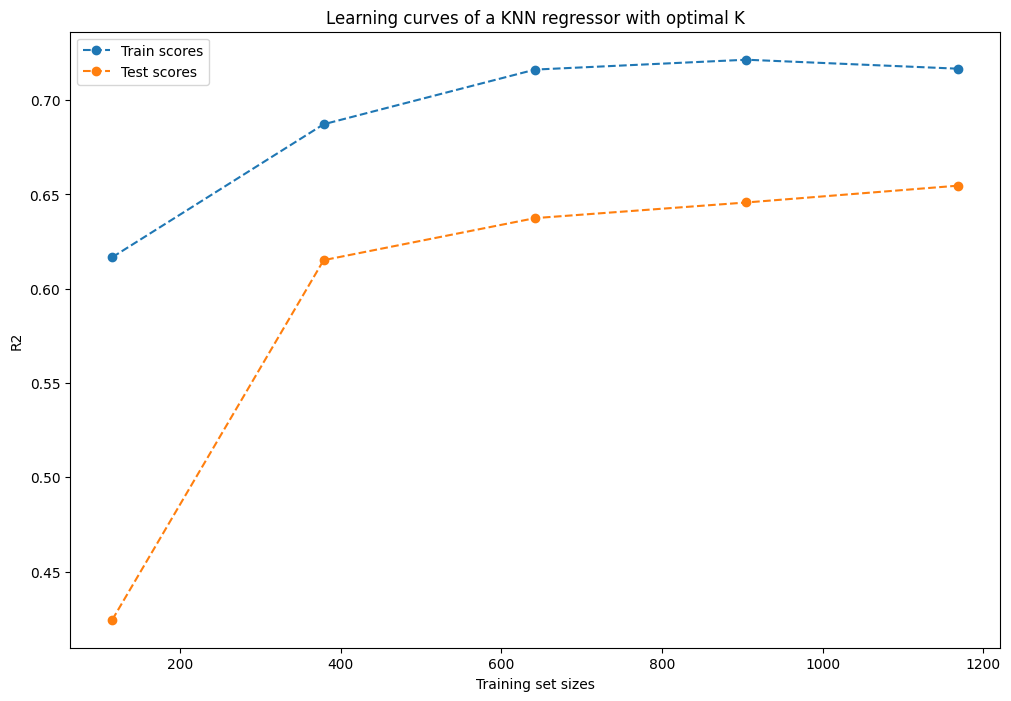

In [21]:
# YOUR CODE HERE

# Plot the learning curves of a KNN regressor with optimal K
model = KNeighborsRegressor(n_neighbors=best_k)
train_sizes, train_scores, test_scores = learning_curve(model, X_rescaled, y, cv=5)

plt.figure(figsize=(12, 8))
plt.plot(
    train_sizes,
    train_scores.mean(axis=1),
    marker="o",
    linestyle="--",
    label="Train scores",
)
plt.plot(
    train_sizes,
    test_scores.mean(axis=1),
    marker="o",
    linestyle="--",
    label="Test scores",
)
plt.xlabel("Training set sizes")
plt.ylabel("R2")
plt.title("Learning curves of a KNN regressor with optimal K")
plt.legend()
plt.show()


👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [24]:
# YOUR CODE HERE
# Calculate Negative Mean Absolute Error (NMAE)
from sklearn.metrics import mean_absolute_error

model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_rescaled, y)
y_pred = model.predict(X_rescaled)

mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

price_error = mae


Mean Absolute Error: 27466.43493150685


### 🧪 Check your code

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [27]:
# YOUR CODE HERE
# Evaluate LinearRegression model on the rescaled data

model = LinearRegression()
cv_results = cross_validate(
    model,
    X_rescaled,
    y,
    cv=5,
    scoring=["max_error", "r2", "neg_mean_absolute_error", "neg_mean_squared_error"],
)

linear_regression_score = cv_results["test_r2"].mean()
print(f"Linear Regression score: {linear_regression_score}")

# Compare the scores of the two models
print(f"KNN score: {rescaled_score}")

best_model = "KNN" if rescaled_score > linear_regression_score else "LinearReg"


Linear Regression score: 0.5944790982110585
KNN score: 0.6496841000103444


💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁